In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [80]:
maneuvers = pd.read_csv("maneuvers_cntrl.csv")
#maneuvers.head()

In [81]:
maneuvers.describe()

,x,y,z,dx,dy,dz,dv_st
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000
mean,-0.991665,4.407464e-07,0.000898,-7.626805e-07,0.009930,-1.398749e-07,0.000004
std,0.000029,2.866435e-05,0.000029,2.819187e-05,0.000029,2.865990e-05,0.000114
min,-0.991715,-4.994556e-05,0.000849,-4.983229e-05,0.009881,-4.979573e-05,-0.000243
25%,-0.991693,-2.358713e-05,0.000873,-2.473676e-05,0.009905,-2.454648e-05,-0.000090
50%,-0.991664,9.902027e-07,0.000899,3.466198e-07,0.009930,3.241270e-08,-0.000003
75%,-0.991640,2.500838e-05,0.000924,2.383133e-05,0.009953,2.485420e-05,0.000104
max,-0.991615,4.990637e-05,0.000948,4.996274e-05,0.009980,4.980988e-05,0.000254


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

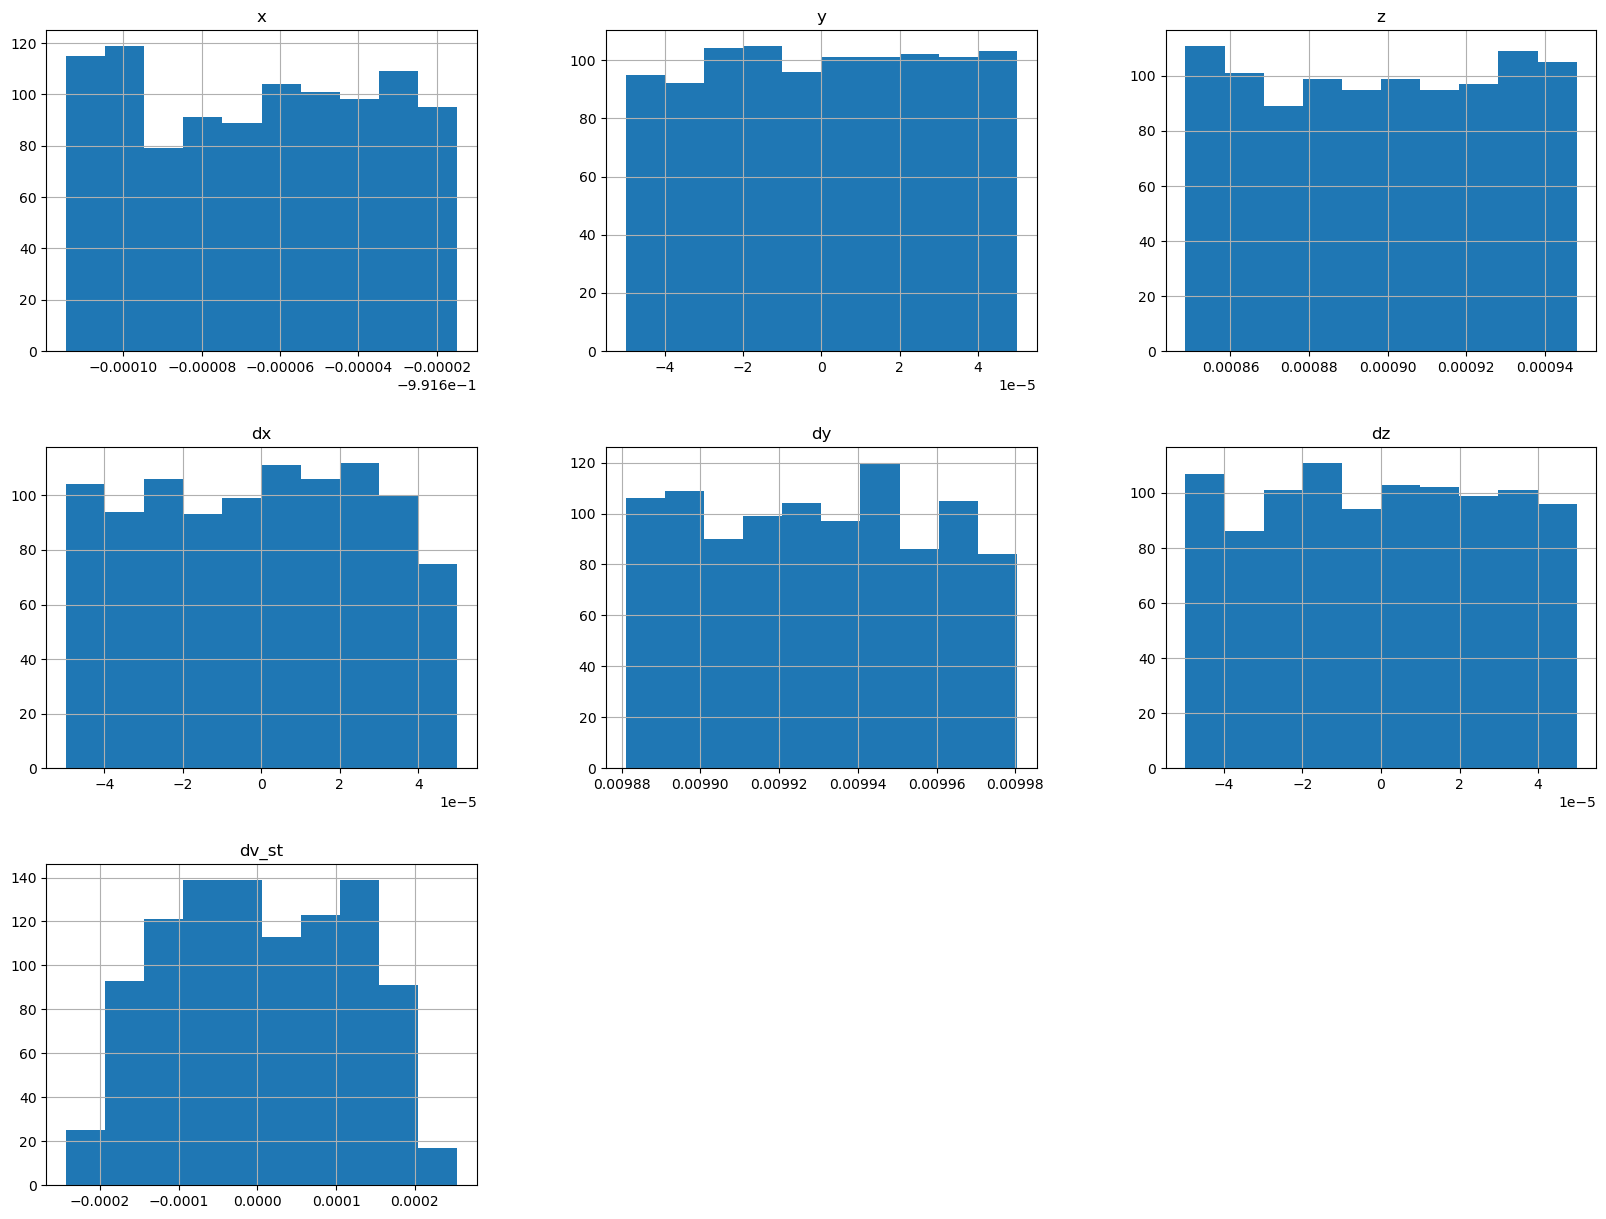

In [82]:
maneuvers.hist(figsize=(20,15))
plt.show()

## Visualizing Data

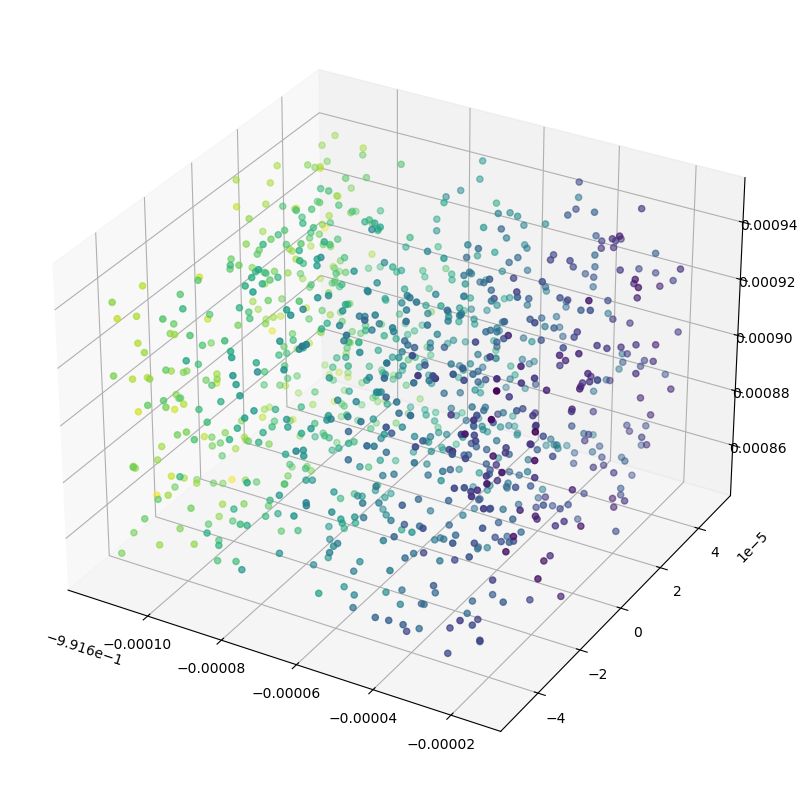

In [83]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [84]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
#maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
y        0.066029
dz       0.023715
z       -0.073499
dy      -0.201657
dx      -0.216155
x       -0.963699
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dx', ylabel='y'>, <Axes: xlabel='dy', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='y', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='y', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dy', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', y

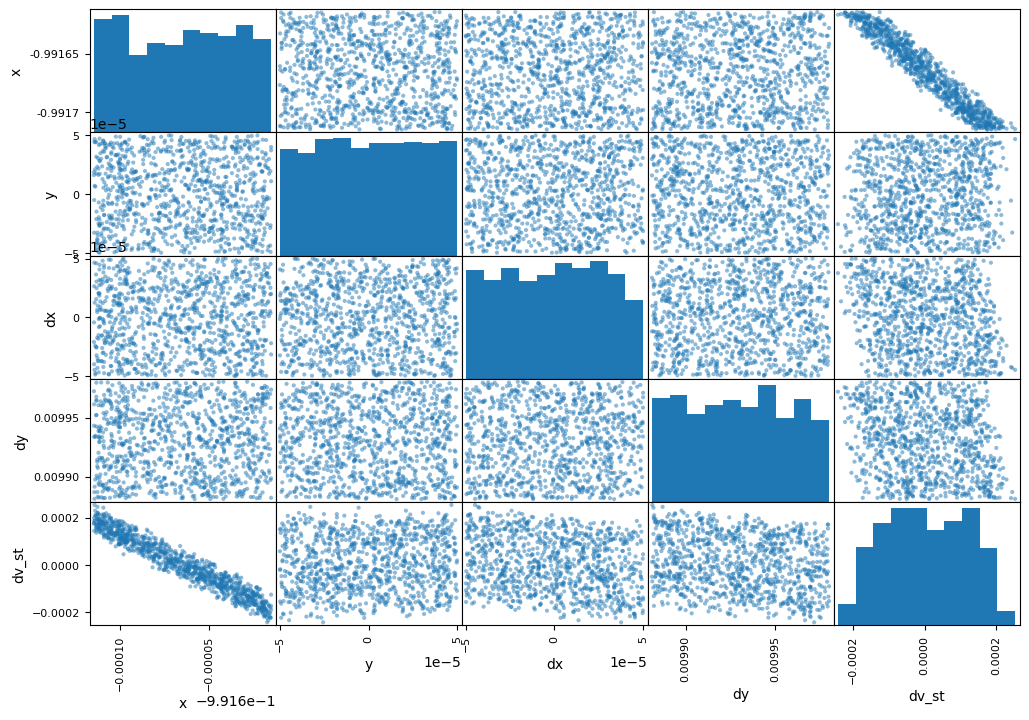

In [85]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "y", "dx", "dy", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [86]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991693,0.000035,0.000850,-0.000038,0.009977,-0.000043
1,-0.991647,-0.000034,0.000922,-0.000005,0.009897,0.000007
2,-0.991636,-0.000038,0.000866,-0.000005,0.009935,0.000006
3,-0.991708,0.000041,0.000898,0.000035,0.009952,-0.000015
4,-0.991704,0.000040,0.000861,-0.000008,0.009978,-0.000043


## Create Train/Test/Validation Sets

In [87]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(600, 6)
(200, 6)
(200, 6)


,x,y,z,dx,dy,dz
149,-0.991693,-0.000034,0.000904,0.000026,0.009957,-0.000004
408,-0.991678,0.000010,0.000899,-0.000003,0.009959,-0.000004
736,-0.991621,0.000025,0.000861,-0.000019,0.009884,-0.000028
676,-0.991619,-0.000011,0.000874,0.000005,0.009938,-0.000012
70,-0.991655,-0.000003,0.000922,-0.000032,0.009931,-0.000018


In [88]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.21325828, 0.15617172, 0.55913877, 0.75715625, 0.76205041,
        0.45595596],
       [0.37123216, 0.59588115, 0.51032871, 0.46458685, 0.78282786,
        0.46070675],
       [0.93860224, 0.75060752, 0.12714757, 0.30965854, 0.03233831,
        0.2184245 ],
       [0.95345708, 0.39504479, 0.25136859, 0.54830512, 0.57489223,
        0.37939933],
       [0.59958455, 0.47267089, 0.73290741, 0.17868529, 0.50100397,
        0.32312945]])

In [89]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.18965307 0.18015157]


In [90]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

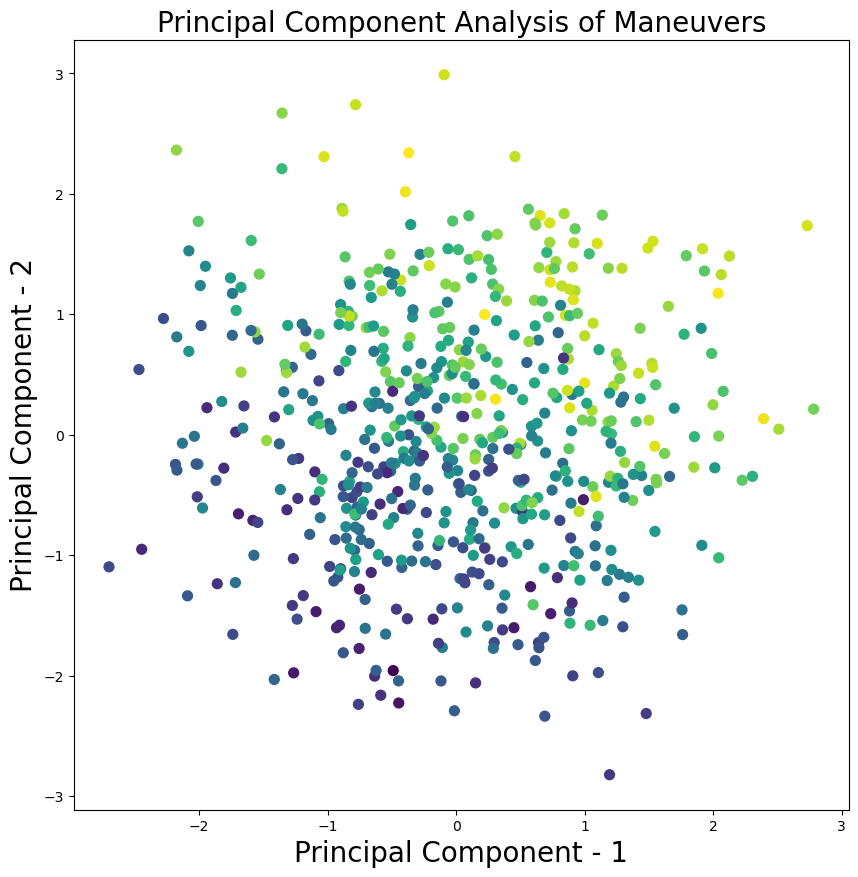

In [91]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [92]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_reg.coef_

array([[-0.80117618,  0.02940448, -0.06068057, -0.16721563, -0.14442105,
        -0.00842385]])

In [94]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0004440030614767876

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [95]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [96]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.9762077538844529, 0.18275558422869986, 0.2621110926125177, 0.8683760043418514, 0.7708917183722455, 0.9762077538844529, 0.19500816092344014, 0.43960734248558075, 0.29256852632010877, 0.42528211094560187]
Labels: [array([1.0587062]), array([0.14344063]), array([0.33136478]), array([0.83147091]), array([0.79617952]), array([1.05085825]), array([0.1590778]), array([0.40633326]), array([0.29361141]), array([0.36691875])]


In [97]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.010083321926840201

## Polynomial Regression

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[0.21325828 0.15617172 0.55913877 0.75715625 0.76205041 0.45595596
 0.04547909 0.03330491 0.11924097 0.16146984 0.16251356 0.09723638
 0.02438961 0.08732166 0.11824639 0.11901072 0.07120743 0.31263616
 0.42335541 0.42609193 0.25494265 0.57328559 0.57699123 0.3452299
 0.58072083 0.34746143 0.20789584]


In [99]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[-8.04960080e-01  3.29549510e-02 -5.76041801e-02 -1.67750025e-01
  -1.43547130e-01 -7.65265996e-03  3.06360813e-03  2.13352743e-04
   1.32280937e-03  2.33505171e-04 -4.41088531e-04  1.83144766e-05
  -3.41821170e-03  5.03570007e-05  5.39142434e-04 -9.99783530e-04
   2.67912590e-05 -3.28977550e-03  4.72167362e-05 -8.36214890e-05
  -9.30744577e-04 -7.96837996e-05  2.91630392e-04  8.31263316e-06
  -2.70057006e-04 -1.38959266e-05 -3.07788670e-04]]


2.2932292896001336e-06

## SVM Regression

In [100]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.060739370674331127

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [101]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [102]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [2.64169149e-06 2.30996446e-06 2.40519955e-06 2.44801737e-06
 2.37851399e-06]
Mean: 2.4366773721833364e-06
Standard deviation: 1.1188331218042136e-07


## Evaluate Model on Test Set

In [103]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.5033177431760028e-06

## Persist model

In [104]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)